In [9]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("results/mnist_count.csv")
df

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.856586,0.575360,0.812667,36.637182,78,1059408000
1,1,2,0.423873,0.431203,0.843667,34.583653,65,1059408000
2,1,3,0.356932,0.386736,0.860833,34.596663,50,1059408000
3,1,4,0.315722,0.382109,0.863278,34.681906,40,1059408000
4,1,5,0.284812,0.401047,0.860111,35.047184,47,1059408000
5,1,6,0.262654,0.401407,0.859778,34.991186,59,1059408000
6,1,7,0.246914,0.433730,0.852889,34.976541,49,1059408000
7,1,8,0.230057,0.425748,0.863333,34.912406,40,1059408000
8,1,9,0.215565,0.424005,0.867222,34.885777,46,1059408000
9,1,10,0.207242,0.458138,0.862444,34.881849,50,1059408000


In [15]:
df["relu_proportion"] = df["zero_relu_call"] / df["total_relu_call"]

In [16]:
test_df = df[df["epoch"] == -1]
train_df = df[df["epoch"] != -1]

## Frequência da ReLU

In [17]:
temp = train_df.groupby("execution").sum()
relu_proportion = temp["zero_relu_call"] / temp["total_relu_call"]
print(f"Proporção Média da ReLU: {relu_proportion.mean()} {temp['zero_relu_call'].mean()}/{temp['total_relu_call'].mean():_}")

Proporção Média da ReLU: 5.2796782102205506e-08 839.0/15_891_120_000.0


<Axes: xlabel='epoch', ylabel='relu_proportion'>

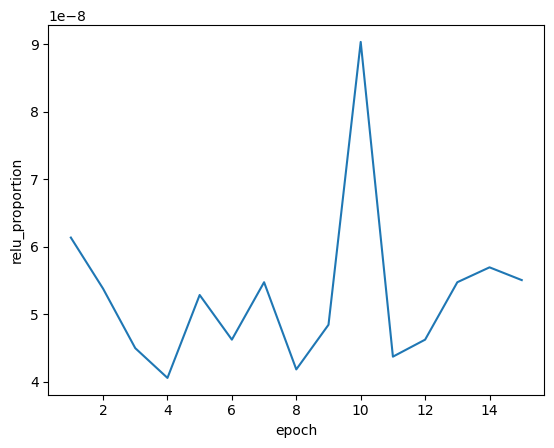

In [24]:
df_train_avg = train_df.groupby("epoch").mean()
sns.lineplot(data=df_train_avg, x="epoch", y="relu_proportion")

In [20]:
df[df["epoch"] == 10]["relu_proportion"]

9     4.719617e-08
25    4.908402e-08
41    1.746258e-07
Name: relu_proportion, dtype: float64

In [13]:
temp

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
epoch,,,,,,,
1,2.0,0.884336,0.572081,0.815889,35.341359,65.000000,1.059408e+09
2,2.0,0.426626,0.416168,0.846574,34.588062,57.000000,1.059408e+09
3,2.0,0.357940,0.386439,0.858407,34.606970,47.666667,1.059408e+09
4,2.0,0.315999,0.384214,0.860981,34.813454,43.000000,1.059408e+09
5,2.0,0.286053,0.390727,0.861463,34.802094,56.000000,1.059408e+09
6,2.0,0.262101,0.407061,0.857630,35.020934,49.000000,1.059408e+09
7,2.0,0.245183,0.424263,0.854574,34.606609,58.000000,1.059408e+09
8,2.0,0.229388,0.429453,0.858704,35.006831,44.333333,1.059408e+09
9,2.0,0.215885,0.438305,0.861370,34.976351,51.333333,1.059408e+09


## Eficiência do Modelo

In [23]:
print(f"Acurácia (teste) média: {round(100*test_df['val_acc'].mean(), 2)}%")

Acurácia (teste) média: 85.61%


<Axes: xlabel='epoch', ylabel='train_loss'>

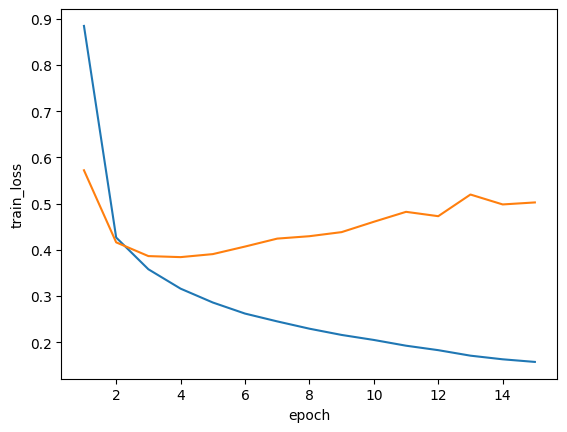

In [26]:
sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss")

In [28]:
df_train_sum = train_df.groupby("epoch").sum()
print(f"Tempo médio de treino: {round(df_train_sum['time'].mean(), 2)} seg")

Tempo médio de treino: 105.31 seg


## Comparando com funções build-in

In [29]:
df_original = pd.read_csv("results/mnist_original.csv")
df_original

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.890138,0.575599,0.816500,31.836987,0,0
1,1,2,0.437842,0.409845,0.849667,30.586399,0,0
2,1,3,0.367599,0.380928,0.861611,30.572753,0,0
3,1,4,0.325662,0.375798,0.865778,31.126844,0,0
4,1,5,0.295074,0.382880,0.865222,31.143856,0,0
5,1,6,0.269621,0.394399,0.864667,30.729959,0,0
6,1,7,0.251432,0.389336,0.865278,30.237190,0,0
7,1,8,0.233070,0.439201,0.856444,30.685955,0,0
8,1,9,0.218329,0.432493,0.861000,31.080002,0,0
9,1,10,0.214181,0.455430,0.859167,30.548151,0,0


In [31]:
test_df_original = df_original[df_original["epoch"] == -1]
train_df_original = df_original[df_original["epoch"] != -1]

In [32]:
# acurácia média
acc_test = test_df["val_acc"].mean()
acc_test_original = test_df_original["val_acc"].mean()
diff = (acc_test - acc_test_original) / acc_test_original
print(acc_test, acc_test_original, diff)

0.8561 0.8531333333333334 0.003477377510353866


<Axes: xlabel='epoch', ylabel='train_loss'>

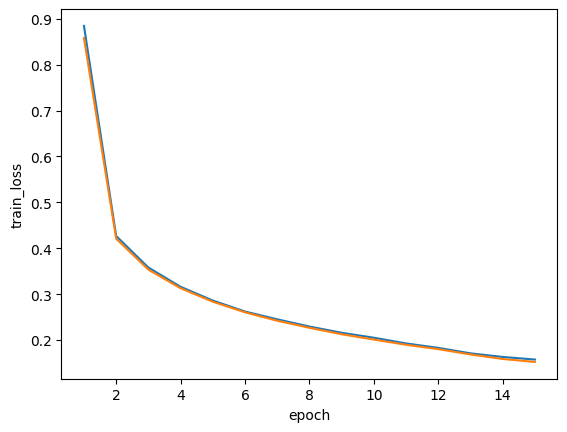

In [33]:
df_train_avg = train_df.groupby("epoch").mean()
df_train_avg_original = train_df_original.groupby("epoch").mean()
sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg_original, x="epoch", y="train_loss")

<Axes: xlabel='epoch', ylabel='val_loss'>

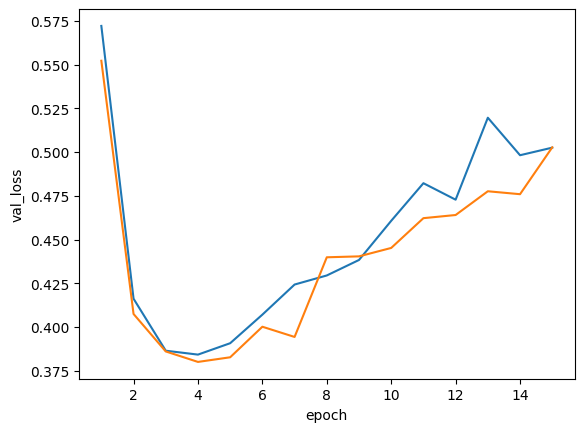

In [39]:
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss")
sns.lineplot(data=df_train_avg_original, x="epoch", y="val_loss")

<Axes: xlabel='epoch', ylabel='time'>

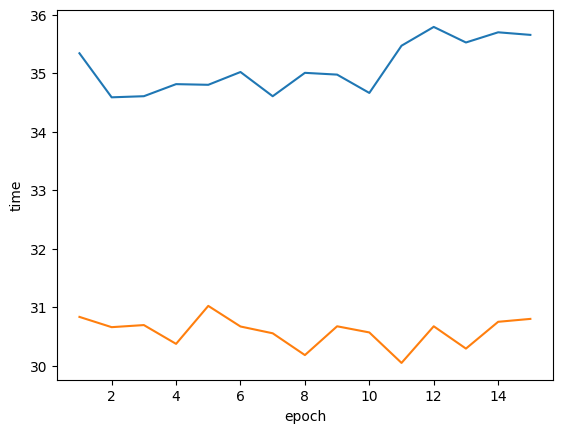

In [38]:
sns.lineplot(data=df_train_avg, x="epoch", y="time")
sns.lineplot(data=df_train_avg_original, x="epoch", y="time")